# Clustering

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings("ignore")

#  Hierarchical Clustering

In [2]:
crime= pd.read_csv("E:/ExcelR/Assignments/Data Science Assignments/7.Clustering/crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
crime.rename(columns={"Unnamed: 0":"US"}, inplace=True)
crime.head()

,US,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   US        50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
# create function to normalize the values
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [6]:
# Normalized data frame
crime_norm = norm_func(crime.iloc[:,1:])
crime_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


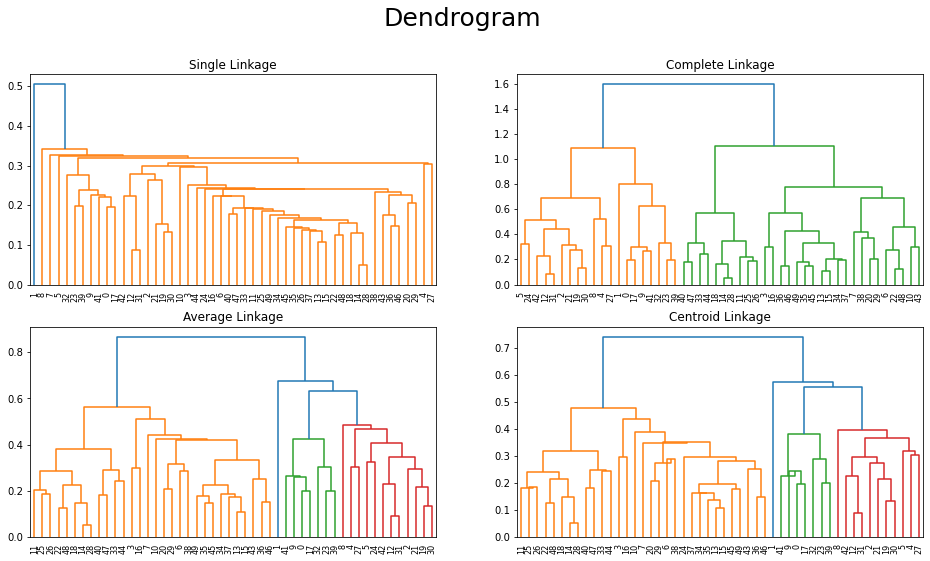

In [7]:
fig = plt.figure(figsize=(16,8.5))
plt.suptitle("Dendrogram", size=25, y=0.99)
plt.subplot(2,2,1)
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method="single"))
plt.title("Single Linkage")

plt.subplot(2,2,2)
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method="complete"))
plt.title("Complete Linkage")

plt.subplot(2,2,3)
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method="average"))
plt.title("Average Linkage")

plt.subplot(2,2,4)
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method="centroid"))
plt.title("Centroid Linkage");

In [8]:
# create 4 clusters using complete linkage
hc = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "complete") 

In [9]:
# segregating as per no. of cluster given and creating a data frame
y_hc = hc.fit_predict(crime_norm)
Clusters=pd.DataFrame(y_hc,columns=["Clusters"])
Clusters.head()

,Clusters
0,0
1,0
2,3
3,1
4,3


In [10]:
# creating a column of clusters 
crime_norm["H_clusterid"] = hc.labels_
crime_norm.tail()

,Murder,Assault,UrbanPop,Rape,H_clusterid
45,0.463855,0.380137,0.525424,0.346253,1
46,0.192771,0.342466,0.694915,0.488372,1
47,0.295181,0.123288,0.118644,0.051680,2
48,0.108434,0.027397,0.576271,0.090439,1
49,0.361446,0.397260,0.474576,0.214470,1


In [11]:
# adding the created column of clusters segregated to the original data set 
crime["H_clusterid"] = hc.labels_
crime.head()

,US,Murder,Assault,UrbanPop,Rape,H_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


In [12]:
# mean values column wise for each cluster 
crime.groupby("H_clusterid").agg(["mean"]).reset_index()

,H_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,14.087500,252.750000,53.500000,24.5375
1,1,5.715000,132.300000,70.800000,18.1000
2,2,3.180000,78.700000,49.300000,11.6300
3,3,10.883333,256.916667,78.333333,32.2500


In [13]:
# no. of records in each cluster
crime["H_clusterid"].value_counts()

1    20
3    12
2    10
0     8
Name: H_clusterid, dtype: int64

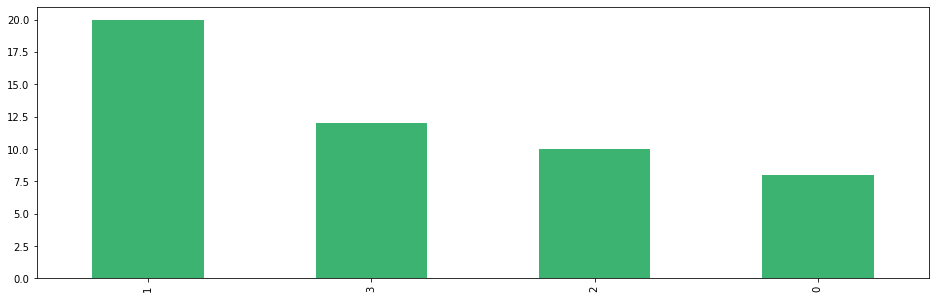

In [14]:
fig = plt.figure(figsize=(16,5))
crime["H_clusterid"].value_counts().plot(kind="bar",color="mediumseagreen");

**Highest no. of records can be seen in 1st Cluster.**

# K-Means Clustering

In [15]:
crime= pd.read_csv("E:/ExcelR/Assignments/Data Science Assignments/7.Clustering/crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [16]:
crime.rename(columns={"Unnamed: 0":"US"}, inplace=True)
crime.head()

,US,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [17]:
# function to Normalize data
scaler = StandardScaler()
crime_norm= scaler.fit_transform(crime.iloc[:,1:])

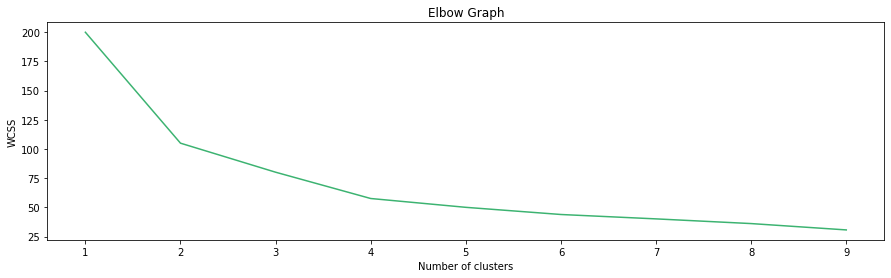

In [18]:
# Scree Plot
wcss = []  
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i,random_state=50)
    kmeans.fit(crime_norm)
    wcss.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(15,4))   
plt.plot(range(1, 10), wcss,color="mediumseagreen")
plt.title("Elbow Graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [19]:
# wcss(Within Cluster Sum of Squares) values for each no. of cluster
pd.DataFrame(wcss)

,0
0,200.000000
1,104.961633
2,80.085695
3,57.554259
4,49.993843
5,43.851539
6,40.094274
7,36.070955
8,30.641136


**As per wcss values in Scree plot the optimal k=3,5**

In [20]:
# Build Cluster algorithm as per k-value (3)
crime_clusters = KMeans(3, random_state=50)
crime_clusters.fit(crime_norm)

KMeans(n_clusters=3, random_state=50)

In [21]:
# Assign clusters to the data set by creating and adding it as new column to the orginal data
crime["KM_clusterid"] = crime_clusters.labels_
crime.head()

,US,Murder,Assault,UrbanPop,Rape,KM_clusterid
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1


In [22]:
# mean values column wise for each cluster 
crime.groupby("KM_clusterid").agg(["mean"]).reset_index()

,KM_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875,73.875000,18.78125
1,1,12.165000,255.250,68.400000,29.16500
2,2,3.971429,86.500,51.928571,12.70000


In [23]:
# no. of records in each cluster
crime["KM_clusterid"].value_counts()

1    20
0    16
2    14
Name: KM_clusterid, dtype: int64

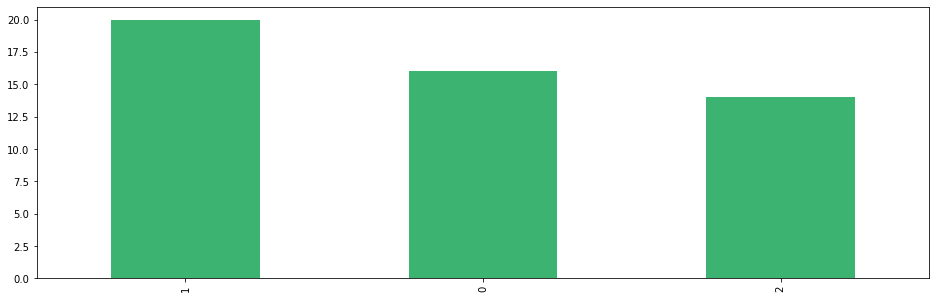

In [24]:
fig = plt.figure(figsize=(16,5))
crime["KM_clusterid"].value_counts().plot(kind="bar",color="mediumseagreen");

**Highest No. of records can be seen in 1st and then 0 Cluster.**

# DBSCAN Clustering

In [25]:
crime= pd.read_csv("E:/ExcelR/Assignments/Data Science Assignments/7.Clustering/crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [26]:
crime.rename(columns={"Unnamed: 0":"US"}, inplace=True)
crime.head()

,US,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [27]:
# tranform to array so that we can apply scaling to the values
crime_array=crime.iloc[:,1:].values

In [28]:
# scaling the values
stscaler = StandardScaler().fit(crime_array)
crime_norm = stscaler.transform(crime_array)

In [29]:
# applying DBSCAN algo
dbscan = DBSCAN(eps=1.4, min_samples=6)
dbscan.fit(crime_norm)

DBSCAN(eps=1.4, min_samples=6)

In [30]:
# Noisy samples are given the label -1.
a=pd.DataFrame(dbscan.labels_)
a.value_counts()

 0    48
-1     2
dtype: int64

In [31]:
# Creating a DataFrame of these Cluster Value
crime_cl =pd.DataFrame(dbscan.labels_,columns=["DB_clusterid"])
crime_cl.tail()

,DB_clusterid
45,0
46,0
47,0
48,0
49,0


In [32]:
# adding the cluster column to the original dataframe
crime =pd.concat([crime,crime_cl],axis=1)
crime.head()

,US,Murder,Assault,UrbanPop,Rape,DB_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [33]:
# List of Outliers 
np.where(crime["DB_clusterid"]== -1)

(array([ 1, 32], dtype=int64),)

In [34]:
# mean values column wise for each cluster 
crime.groupby("DB_clusterid").agg(["mean"]).reset_index()

,DB_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.500000,300.000,46.500000,30.300000
1,0,7.633333,165.375,66.333333,20.854167


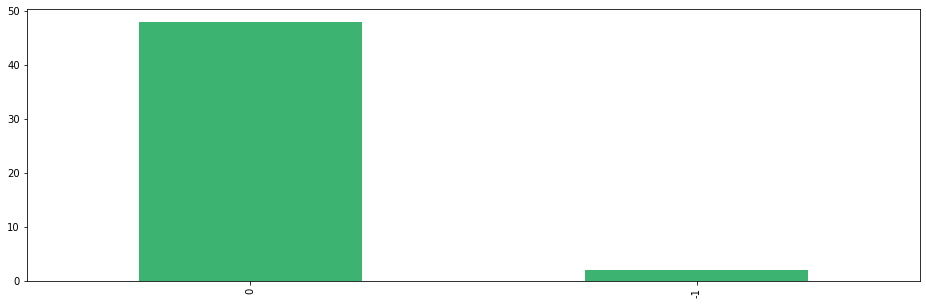

In [35]:
fig = plt.figure(figsize=(16,5))
crime["DB_clusterid"].value_counts().plot(kind="bar",color="mediumseagreen");